In [1]:
import pandas as pd
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [20]:
variables=pd.read_csv('http://bit.ly/2PtKkDl', header=None)
variables.head(10)

,0
0,1455.219971
1,1399.420044
2,1402.109985
3,1403.449951
4,1441.469971
5,1457.599976
6,1438.560059
7,1432.250000
8,1449.680054
9,1465.150024


In [21]:
variables.shape

(4171, 1)

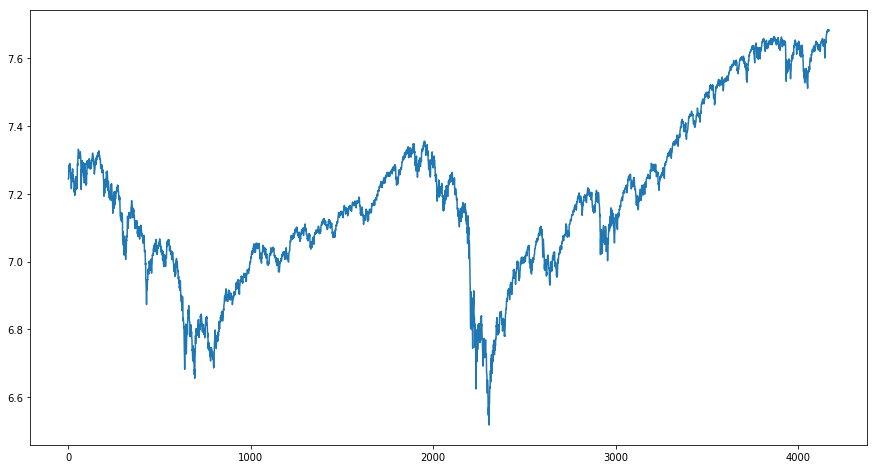

In [12]:
plt.figure(figsize=(15,8))
inprice=np.log(variables)
inprice
plt.plot(inprice)
plt.show()

<Figure size 1080x576 with 0 Axes>

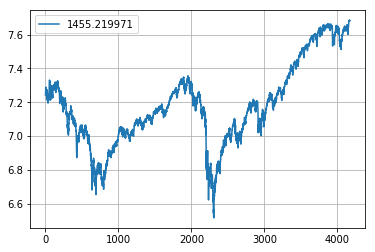

In [11]:
plt.figure(figsize=(15,8))
inprice=np.log(variables)
inprice.plot(grid=True)
plt.show()

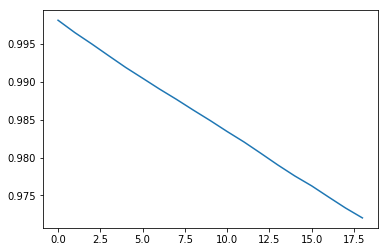

In [13]:
acf_1=acf(inprice)[1:20]
plt.plot(acf_1)
plt.show()

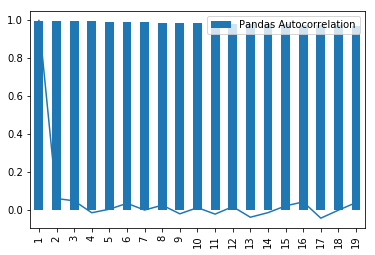

ValueError: too many values to unpack (expected 2)

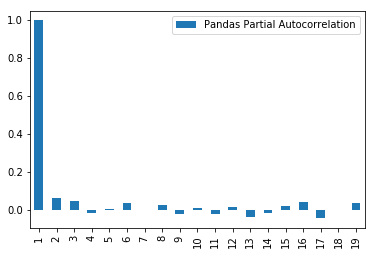

In [16]:
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(inprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(inprice, 1)
result

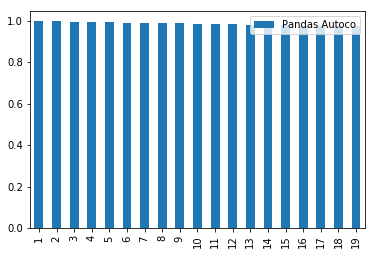

In [17]:
test_df=pd.DataFrame([acf_1]).T
test_df.columns=['Pandas Autoco']
test_df.index+=1
test_df.plot(kind='bar')


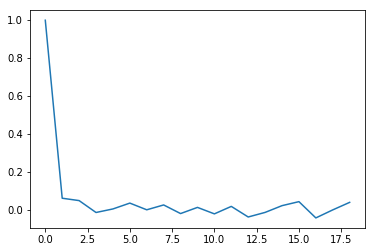

In [18]:
pacf_1=pacf(inprice)[1:20]
plt.plot(pacf_1)
plt.show()


ValueError: too many values to unpack (expected 2)

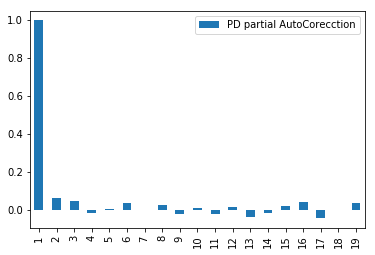

In [19]:
test_df=pd.DataFrame([pacf_1]).T
test_df.columns=['PD partial AutoCorecction']
test_df.index+=1
test_df.plot(kind='bar')
result=ts.adfuller(inprice,1)
result

In [24]:
price_matrix=inprice.as_matrix()
model=ARIMA(price_matrix, order=(0,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())

C:\Users\rabis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4169
Model:                 ARIMA(0, 1, 0)   Log Likelihood               12334.326
Method:                           css   S.D. of innovations              0.013
Date:                Sat, 15 Sep 2018   AIC                         -24664.651
Time:                        23:09:59   BIC                         -24651.980
Sample:                             1   HQIC                        -24660.169
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.542      0.588      -0.000       0.000


In [25]:
prediction=model_fit.predict(122, 127, typ='levels')
prediction

array([7.27980342, 7.28274274, 7.27416206, 7.28259153, 7.29281005,
       7.27682075])

In [26]:
predictionsadjusted=np.exp(prediction)
predictionsadjusted

array([1450.70282071, 1454.97316742, 1442.5419273 , 1454.75317425,
       1469.69481074, 1446.38229672])